In [1]:
import torch
import torch.nn as nn

In [2]:
import numpy as np

In [3]:
from sklearn import datasets

In [4]:
import matplotlib.pyplot as plt

In [5]:
# Dataseti hazırlama kısmı.
X_numpy, Y_numpy = datasets.make_regression(n_samples=100, n_features=1,noise=20,random_state=1)

In [7]:
X = torch.from_numpy(X_numpy.astype(np.float32))
Y = torch.from_numpy(Y_numpy.astype(np.float32))
Y = Y.view(Y.shape[0],1)

In [8]:
n_samples, n_features = X.shape

In [9]:
# Modeli hazırlama kısmı
input_size = n_features
output_size = 1
model = nn.Linear(input_size, output_size)


In [10]:
# Loss ve optimizer ayarlama kısımları
criterion = nn.MSELoss()
learning_rate = 0.01
optimizer = torch.optim.SGD(model.parameters(), lr = learning_rate)

In [12]:
# Training kısmı
num_epochs = 100
for epoch in range(num_epochs):
    # forward pass ve loss
    y_predicted = model(X)
    loss = criterion(y_predicted, Y)
    
    # backward pass kısmı
    loss.backward()
    
    # weight update kısmı
    optimizer.step()
    
    optimizer.zero_grad()
    
    if(epoch % 1 == 0):
        print(f'epoch : {epoch +1}, loss= {loss.item():.4f}')

epoch : 1, loss= 559.7015
epoch : 2, loss= 552.6465
epoch : 3, loss= 545.8115
epoch : 4, loss= 539.1899
epoch : 5, loss= 532.7747
epoch : 6, loss= 526.5594
epoch : 7, loss= 520.5379
epoch : 8, loss= 514.7042
epoch : 9, loss= 509.0523
epoch : 10, loss= 503.5763
epoch : 11, loss= 498.2709
epoch : 12, loss= 493.1310
epoch : 13, loss= 488.1510
epoch : 14, loss= 483.3260
epoch : 15, loss= 478.6514
epoch : 16, loss= 474.1221
epoch : 17, loss= 469.7339
epoch : 18, loss= 465.4821
epoch : 19, loss= 461.3627
epoch : 20, loss= 457.3716
epoch : 21, loss= 453.5044
epoch : 22, loss= 449.7575
epoch : 23, loss= 446.1272
epoch : 24, loss= 442.6098
epoch : 25, loss= 439.2015
epoch : 26, loss= 435.8993
epoch : 27, loss= 432.6997
epoch : 28, loss= 429.5996
epoch : 29, loss= 426.5957
epoch : 30, loss= 423.6851
epoch : 31, loss= 420.8650
epoch : 32, loss= 418.1324
epoch : 33, loss= 415.4845
epoch : 34, loss= 412.9189
epoch : 35, loss= 410.4330
epoch : 36, loss= 408.0243
epoch : 37, loss= 405.6903
epoch : 38

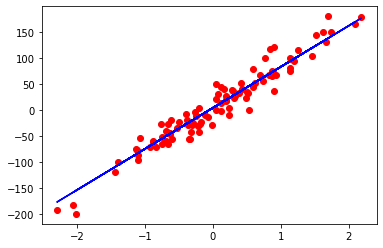

In [13]:
predicted = model(X).detach() # Gradient hesaplamasını istemediği yeni bir tensor oluşturuyor.
plt.plot(X_numpy,Y_numpy,'ro')
plt.plot(X_numpy, predicted,'b')
plt.show()